In [1]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from my_lib.net import MultiLayerNetExtend
from my_lib.optimizer import SGD

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)
x_train = x_train[:1000]
y_train = y_train[:1000]

In [4]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [5]:
def train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], 
                                     output_size=10, weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], 
                                  output_size=10, weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        y_batch = y_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, y_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, y_train)
            bn_train_acc = bn_network.accuracy(x_train, y_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print(f"epoch: {epoch_cnt} | {train_acc} - {bn_train_acc}")

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch: 0 | 0.094 - 0.114
epoch: 1 | 0.093 - 0.107
epoch: 2 | 0.097 - 0.156
epoch: 3 | 0.097 - 0.171
epoch: 4 | 0.097 - 0.191
epoch: 5 | 0.097 - 0.207
epoch: 6 | 0.097 - 0.219
epoch: 7 | 0.097 - 0.251
epoch: 8 | 0.097 - 0.267
epoch: 9 | 0.097 - 0.293
epoch: 10 | 0.097 - 0.311
epoch: 11 | 0.097 - 0.326
epoch: 12 | 0.097 - 0.343
epoch: 13 | 0.097 - 0.356
epoch: 14 | 0.097 - 0.373
epoch: 15 | 0.097 - 0.377
epoch: 16 | 0.097 - 0.391
epoch: 17 | 0.097 - 0.418
epoch: 18 | 0.097 - 0.427

No handles with labels found to put in legend.



epoch: 19 | 0.097 - 0.445
============== 2/16 ==============
epoch: 0 | 0.097 - 0.076
epoch: 1 | 0.097 - 0.102
epoch: 2 | 0.097 - 0.124
epoch: 3 | 0.097 - 0.148
epoch: 4 | 0.097 - 0.176
epoch: 5 | 0.097 - 0.205
epoch: 6 | 0.097 - 0.237
epoch: 7 | 0.097 - 0.256
epoch: 8 | 0.097 - 0.282
epoch: 9 | 0.097 - 0.315
epoch: 10 | 0.097 - 0.336
epoch: 11 | 0.097 - 0.362
epoch: 12 | 0.097 - 0.383
epoch: 13 | 0.097 - 0.408
epoch: 14 | 0.097 - 0.422
epoch: 15 | 0.097 - 0.451
epoch: 16 | 0.097 - 0.473
epoch: 17 | 0.097 - 0.485
epoch: 18 | 0.097 - 0.506
epoch: 19 | 0.097 - 0.516

No handles with labels found to put in legend.



============== 3/16 ==============
epoch: 0 | 0.198 - 0.114
epoch: 1 | 0.452 - 0.114
epoch: 2 | 0.582 - 0.141
epoch: 3 | 0.675 - 0.164
epoch: 4 | 0.732 - 0.201
epoch: 5 | 0.777 - 0.246
epoch: 6 | 0.838 - 0.274
epoch: 7 | 0.858 - 0.321
epoch: 8 | 0.895 - 0.359
epoch: 9 | 0.921 - 0.392
epoch: 10 | 0.941 - 0.42
epoch: 11 | 0.962 - 0.452
epoch: 12 | 0.972 - 0.477
epoch: 13 | 0.976 - 0.508
epoch: 14 | 0.982 - 0.526
epoch: 15 | 0.984 - 0.558
epoch: 16 | 0.994 - 0.582
epoch: 17 | 0.994 - 0.596
epoch: 18 | 0.996 - 0.627

No handles with labels found to put in legend.



epoch: 19 | 0.998 - 0.642
============== 4/16 ==============
epoch: 0 | 0.144 - 0.097
epoch: 1 | 0.22 - 0.122
epoch: 2 | 0.339 - 0.182
epoch: 3 | 0.418 - 0.263
epoch: 4 | 0.504 - 0.332
epoch: 5 | 0.561 - 0.39
epoch: 6 | 0.608 - 0.448
epoch: 7 | 0.645 - 0.511
epoch: 8 | 0.681 - 0.55
epoch: 9 | 0.713 - 0.588
epoch: 10 | 0.735 - 0.617
epoch: 11 | 0.752 - 0.647
epoch: 12 | 0.767 - 0.664
epoch: 13 | 0.778 - 0.687
epoch: 14 | 0.773 - 0.706
epoch: 15 | 0.802 - 0.721
epoch: 16 | 0.812 - 0.743
epoch: 17 | 0.826 - 0.754
epoch: 18 | 0.829 - 0.764


No handles with labels found to put in legend.


epoch: 19 | 0.842 - 0.781
============== 5/16 ==============
epoch: 0 | 0.079 - 0.084
epoch: 1 | 0.091 - 0.136
epoch: 2 | 0.103 - 0.275
epoch: 3 | 0.121 - 0.397
epoch: 4 | 0.129 - 0.508
epoch: 5 | 0.152 - 0.58
epoch: 6 | 0.175 - 0.62
epoch: 7 | 0.192 - 0.668
epoch: 8 | 0.236 - 0.71
epoch: 9 | 0.254 - 0.724
epoch: 10 | 0.28 - 0.748
epoch: 11 | 0.297 - 0.776
epoch: 12 | 0.32 - 0.79
epoch: 13 | 0.329 - 0.811
epoch: 14 | 0.353 - 0.815
epoch: 15 | 0.362 - 0.836
epoch: 16 | 0.379 - 0.853
epoch: 17 | 0.395 - 0.863
epoch: 18 | 0.408 - 0.865
epoch: 19 | 0.429 - 0.879

No handles with labels found to put in legend.



============== 6/16 ==============
epoch: 0 | 0.073 - 0.101
epoch: 1 | 0.103 - 0.205
epoch: 2 | 0.116 - 0.421
epoch: 3 | 0.144 - 0.556
epoch: 4 | 0.13 - 0.61
epoch: 5 | 0.116 - 0.674
epoch: 6 | 0.116 - 0.706
epoch: 7 | 0.116 - 0.748
epoch: 8 | 0.116 - 0.775
epoch: 9 | 0.128 - 0.804
epoch: 10 | 0.138 - 0.819
epoch: 11 | 0.143 - 0.84
epoch: 12 | 0.14 - 0.859
epoch: 13 | 0.117 - 0.869
epoch: 14 | 0.167 - 0.887
epoch: 15 | 0.117 - 0.902
epoch: 16 | 0.117 - 0.911
epoch: 17 | 0.117 - 0.924
epoch: 18 | 0.117 - 0.931

No handles with labels found to put in legend.



epoch: 19 | 0.117 - 0.933
============== 7/16 ==============
epoch: 0 | 0.121 - 0.101
epoch: 1 | 0.116 - 0.314
epoch: 2 | 0.116 - 0.557
epoch: 3 | 0.117 - 0.691
epoch: 4 | 0.117 - 0.748
epoch: 5 | 0.117 - 0.78
epoch: 6 | 0.117 - 0.822
epoch: 7 | 0.117 - 0.85
epoch: 8 | 0.117 - 0.877
epoch: 9 | 0.117 - 0.902
epoch: 10 | 0.117 - 0.924
epoch: 11 | 0.117 - 0.928
epoch: 12 | 0.117 - 0.94
epoch: 13 | 0.117 - 0.955
epoch: 14 | 0.117 - 0.959
epoch: 15 | 0.117 - 0.969
epoch: 16 | 0.117 - 0.98
epoch: 17 | 0.117 - 0.984
epoch: 18 | 0.116 - 0.986

No handles with labels found to put in legend.



epoch: 19 | 0.156 - 0.991
============== 8/16 ==============
epoch: 0 | 0.117 - 0.083
epoch: 1 | 0.117 - 0.3
epoch: 2 | 0.116 - 0.619
epoch: 3 | 0.116 - 0.75
epoch: 4 | 0.117 - 0.82
epoch: 5 | 0.117 - 0.856
epoch: 6 | 0.117 - 0.895
epoch: 7 | 0.117 - 0.928
epoch: 8 | 0.117 - 0.941
epoch: 9 | 0.117 - 0.969
epoch: 10 | 0.117 - 0.977
epoch: 11 | 0.117 - 0.985
epoch: 12 | 0.117 - 0.987
epoch: 13 | 0.117 - 0.99
epoch: 14 | 0.117 - 0.991
epoch: 15 | 0.117 - 0.991
epoch: 16 | 0.117 - 0.993
epoch: 17 | 0.117 - 0.994
epoch: 18 | 0.117 - 0.998
epoch: 19 | 0.117 - 0.998

No handles with labels found to put in legend.



============== 9/16 ==============
epoch: 0 | 0.1 - 0.105
epoch: 1 | 0.117 - 0.646
epoch: 2 | 0.117 - 0.734
epoch: 3 | 0.116 - 0.817
epoch: 4 | 0.116 - 0.853
epoch: 5 | 0.116 - 0.902
epoch: 6 | 0.116 - 0.958
epoch: 7 | 0.116 - 0.971
epoch: 8 | 0.116 - 0.984
epoch: 9 | 0.117 - 0.987
epoch: 10 | 0.117 - 0.994
epoch: 11 | 0.117 - 0.994
epoch: 12 | 0.117 - 0.995
epoch: 13 | 0.116 - 0.996
epoch: 14 | 0.116 - 0.998
epoch: 15 | 0.116 - 0.999
epoch: 16 | 0.116 - 1.0
epoch: 17 | 0.116 - 1.0
epoch: 18 | 0.116 - 1.0
epoch: 19 | 0.116 - 1.0

No handles with labels found to put in legend.



============== 10/16 ==============
epoch: 0 | 0.105 - 0.134
epoch: 1 | 0.117 - 0.587
epoch: 2 | 0.117 - 0.723
epoch: 3 | 0.117 - 0.835
epoch: 4 | 0.117 - 0.932
epoch: 5 | 0.117 - 0.951
epoch: 6 | 0.117 - 0.926
epoch: 7 | 0.117 - 0.977
epoch: 8 | 0.117 - 0.983
epoch: 9 | 0.117 - 0.985
epoch: 10 | 0.117 - 0.988
epoch: 11 | 0.117 - 0.992
epoch: 12 | 0.117 - 0.997
epoch: 13 | 0.117 - 0.994
epoch: 14 | 0.117 - 0.997
epoch: 15 | 0.117 - 0.998
epoch: 16 | 0.117 - 0.998
epoch: 17 | 0.117 - 0.998
epoch: 18 | 0.117 - 0.998

No handles with labels found to put in legend.



epoch: 19 | 0.117 - 0.998
============== 11/16 ==============
epoch: 0 | 0.1 - 0.129
epoch: 1 | 0.116 - 0.56
epoch: 2 | 0.116 - 0.74
epoch: 3 | 0.117 - 0.811
epoch: 4 | 0.117 - 0.817
epoch: 5 | 0.116 - 0.866
epoch: 6 | 0.116 - 0.876
epoch: 7 | 0.116 - 0.891
epoch: 8 | 0.116 - 0.891
epoch: 9 | 0.116 - 0.896
epoch: 10 | 0.116 - 0.88
epoch: 11 | 0.116 - 0.892
epoch: 12 | 0.116 - 0.896
epoch: 13 | 0.117 - 0.899
epoch: 14 | 0.117 - 0.896
epoch: 15 | 0.116 - 0.902
epoch: 16 | 0.117 - 0.9
epoch: 17 | 0.116 - 0.903
epoch: 18 | 0.116 - 0.985

No handles with labels found to put in legend.



epoch: 19 | 0.116 - 0.992
============== 12/16 ==============
epoch: 0 | 0.117 - 0.143
epoch: 1 | 0.116 - 0.521
epoch: 2 | 0.116 - 0.592
epoch: 3 | 0.116 - 0.621
epoch: 4 | 0.116 - 0.604
epoch: 5 | 0.116 - 0.68
epoch: 6 | 0.116 - 0.647
epoch: 7 | 0.116 - 0.681
epoch: 8 | 0.116 - 0.678
epoch: 9 | 0.116 - 0.666
epoch: 10 | 0.116 - 0.693
epoch: 11 | 0.116 - 0.608
epoch: 12 | 0.116 - 0.784
epoch: 13 | 0.116 - 0.789
epoch: 14 | 0.116 - 0.858
epoch: 15 | 0.116 - 0.889
epoch: 16 | 0.116 - 0.889
epoch: 17 | 0.116 - 0.89
epoch: 18 | 0.116 - 0.845
epoch: 19 | 0.116 - 0.897

No handles with labels found to put in legend.



============== 13/16 ==============
epoch: 0 | 0.117 - 0.097
epoch: 1 | 0.117 - 0.388
epoch: 2 | 0.117 - 0.634
epoch: 3 | 0.117 - 0.631
epoch: 4 | 0.117 - 0.692
epoch: 5 | 0.116 - 0.699
epoch: 6 | 0.116 - 0.666
epoch: 7 | 0.116 - 0.664
epoch: 8 | 0.116 - 0.76
epoch: 9 | 0.116 - 0.772
epoch: 10 | 0.116 - 0.784
epoch: 11 | 0.116 - 0.788
epoch: 12 | 0.116 - 0.798
epoch: 13 | 0.116 - 0.797
epoch: 14 | 0.116 - 0.79
epoch: 15 | 0.116 - 0.773
epoch: 16 | 0.116 - 0.794
epoch: 17 | 0.116 - 0.802

No handles with labels found to put in legend.



epoch: 18 | 0.116 - 0.798
epoch: 19 | 0.116 - 0.79
============== 14/16 ==============
epoch: 0 | 0.092 - 0.142
epoch: 1 | 0.117 - 0.365
epoch: 2 | 0.117 - 0.487
epoch: 3 | 0.117 - 0.544
epoch: 4 | 0.117 - 0.583
epoch: 5 | 0.117 - 0.582
epoch: 6 | 0.117 - 0.575
epoch: 7 | 0.117 - 0.647
epoch: 8 | 0.117 - 0.664
epoch: 9 | 0.117 - 0.65
epoch: 10 | 0.117 - 0.7
epoch: 11 | 0.117 - 0.673
epoch: 12 | 0.117 - 0.659
epoch: 13 | 0.117 - 0.658
epoch: 14 | 0.117 - 0.689
epoch: 15 | 0.117 - 0.683
epoch: 16 | 0.117 - 0.69
epoch: 17 | 0.117 - 0.696


No handles with labels found to put in legend.


epoch: 18 | 0.117 - 0.71
epoch: 19 | 0.117 - 0.713
============== 15/16 ==============
epoch: 0 | 0.099 - 0.084
epoch: 1 | 0.117 - 0.298
epoch: 2 | 0.117 - 0.362
epoch: 3 | 0.116 - 0.384
epoch: 4 | 0.117 - 0.475
epoch: 5 | 0.117 - 0.488
epoch: 6 | 0.117 - 0.491
epoch: 7 | 0.117 - 0.499
epoch: 8 | 0.117 - 0.488
epoch: 9 | 0.117 - 0.496
epoch: 10 | 0.117 - 0.502
epoch: 11 | 0.117 - 0.502
epoch: 12 | 0.117 - 0.517
epoch: 13 | 0.117 - 0.525
epoch: 14 | 0.117 - 0.587
epoch: 15 | 0.117 - 0.598
epoch: 16 | 0.117 - 0.6
epoch: 17 | 0.117 - 0.292


No handles with labels found to put in legend.


epoch: 18 | 0.117 - 0.598
epoch: 19 | 0.117 - 0.606
============== 16/16 ==============
epoch: 0 | 0.117 - 0.13
epoch: 1 | 0.116 - 0.307
epoch: 2 | 0.117 - 0.364
epoch: 3 | 0.117 - 0.392
epoch: 4 | 0.117 - 0.394
epoch: 5 | 0.116 - 0.413
epoch: 6 | 0.116 - 0.383
epoch: 7 | 0.116 - 0.406
epoch: 8 | 0.116 - 0.404
epoch: 9 | 0.116 - 0.466
epoch: 10 | 0.116 - 0.538
epoch: 11 | 0.116 - 0.49
epoch: 12 | 0.116 - 0.531
epoch: 13 | 0.116 - 0.529
epoch: 14 | 0.116 - 0.564
epoch: 15 | 0.117 - 0.568
epoch: 16 | 0.117 - 0.602
epoch: 17 | 0.116 - 0.52
epoch: 18 | 0.117 - 0.526
epoch: 19 | 0.116 - 0.573


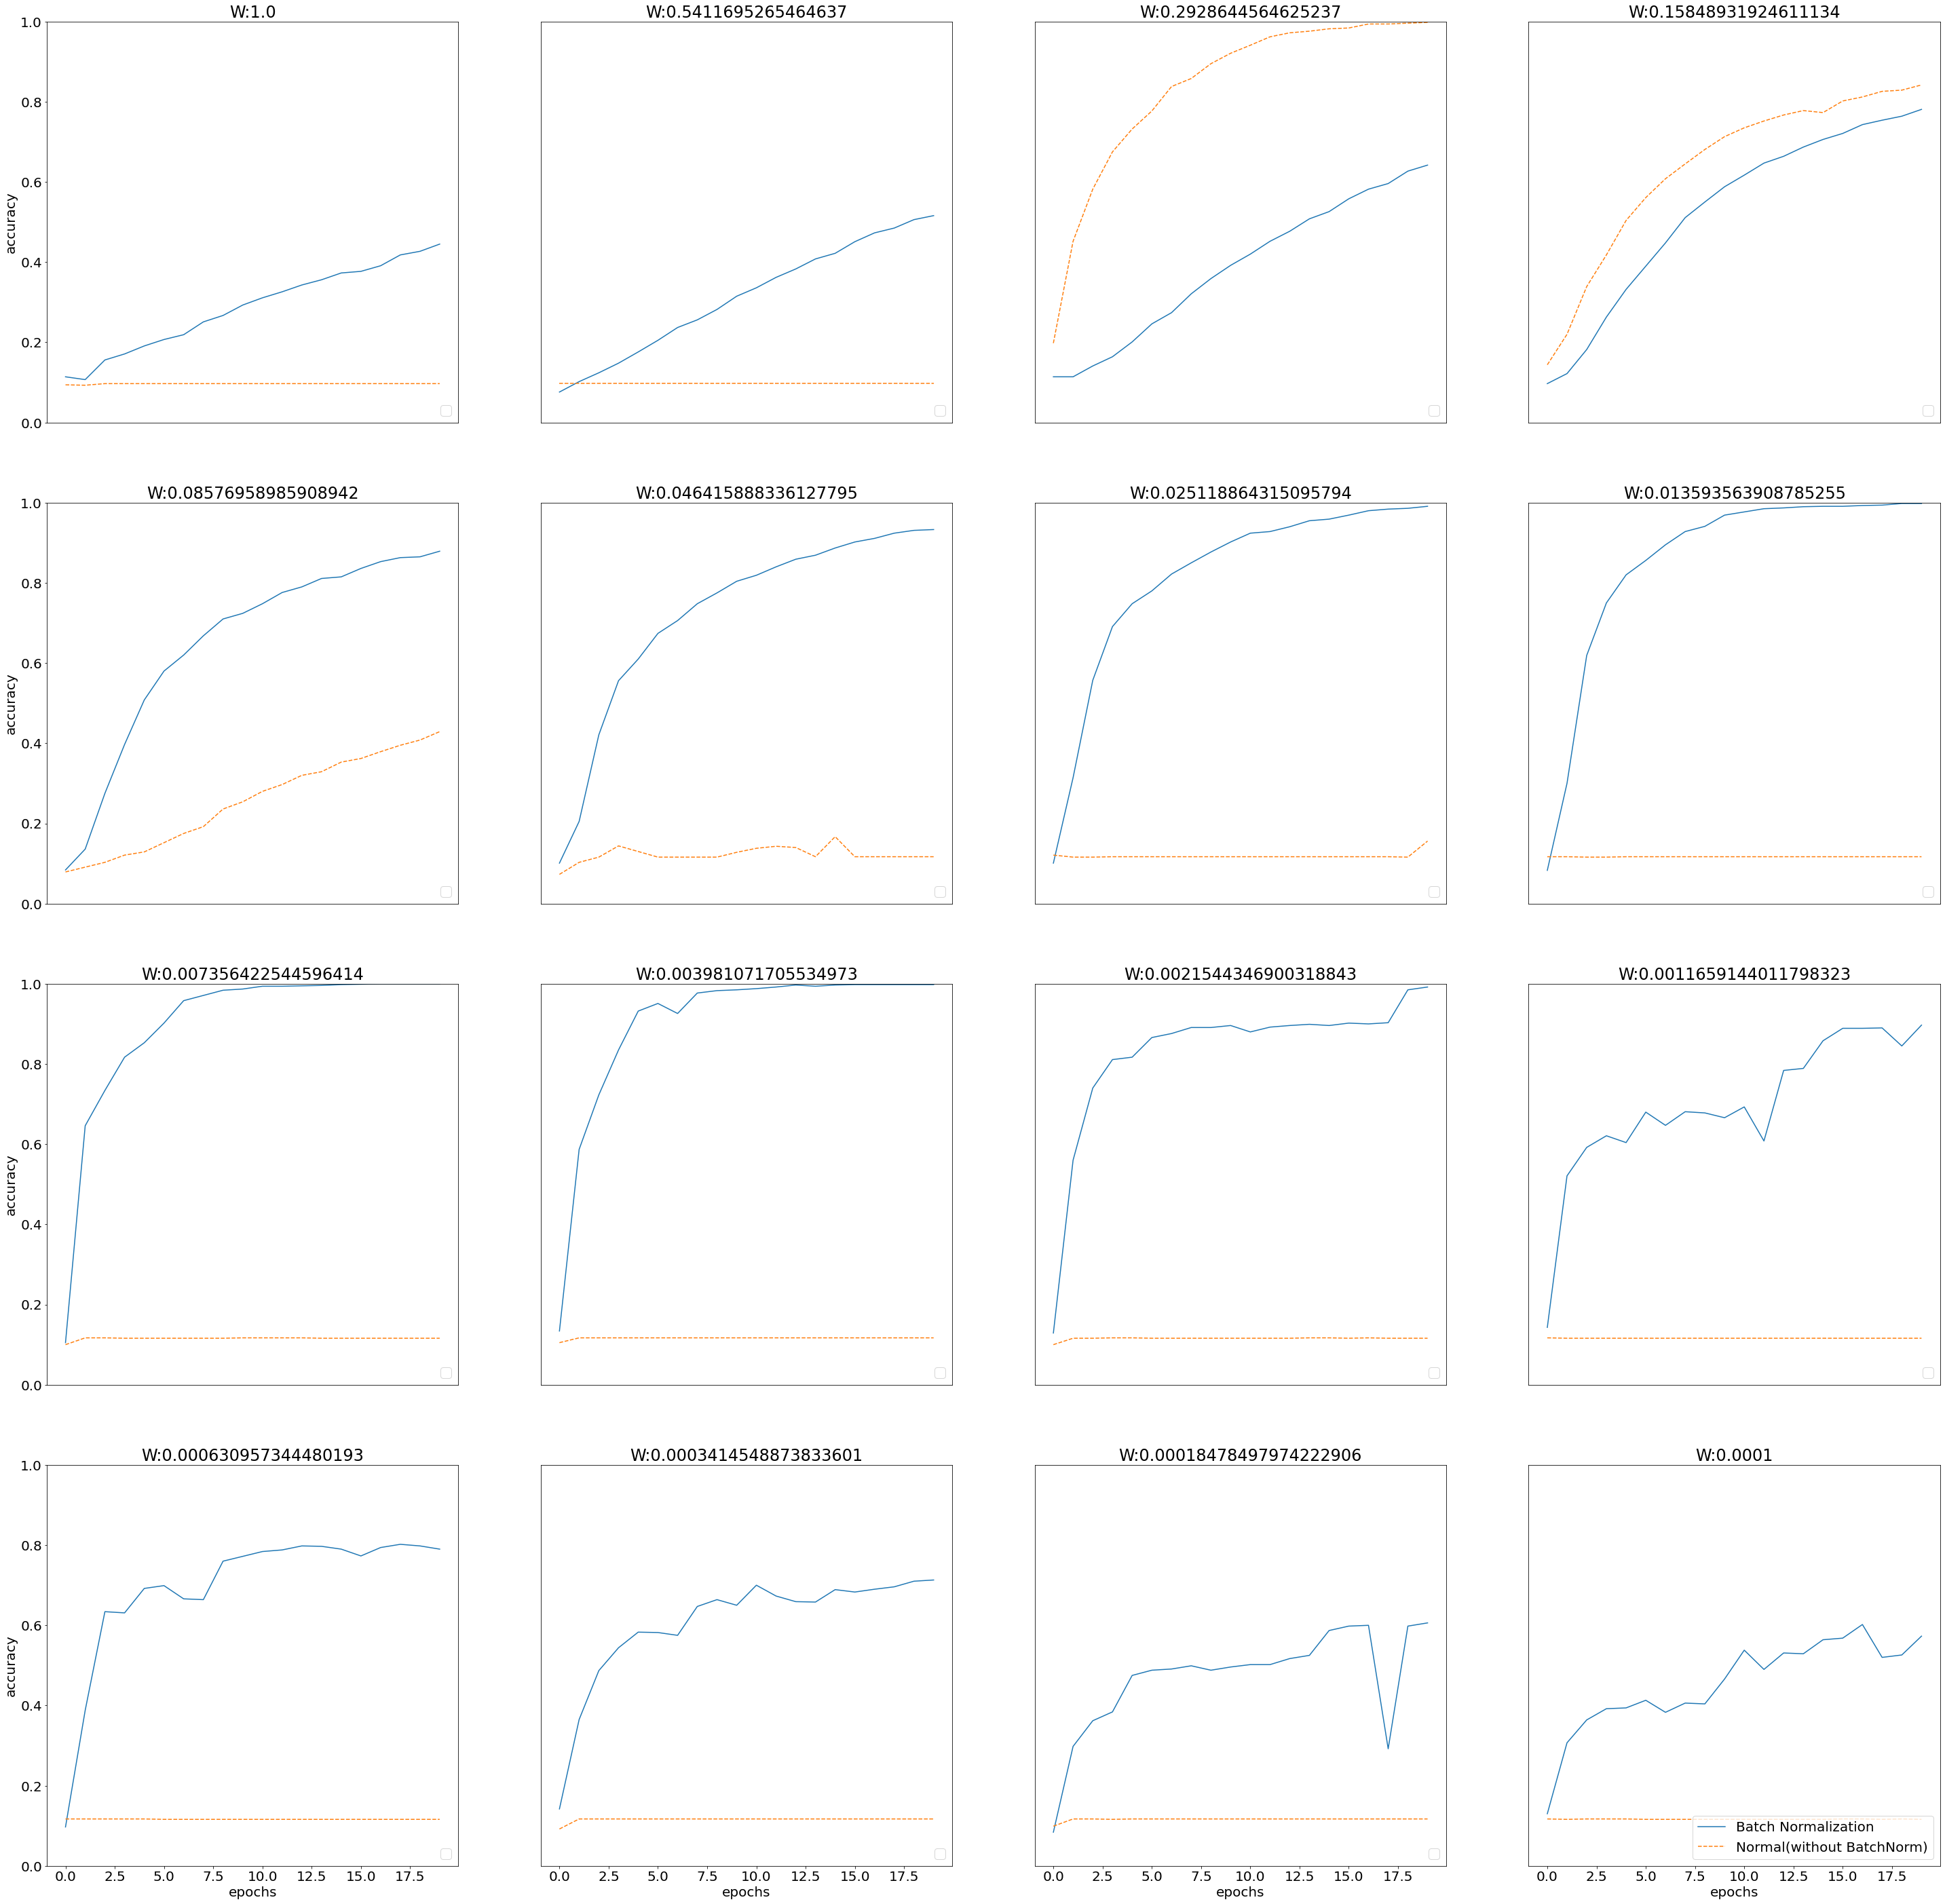

In [6]:
import matplotlib.pyplot as plt

weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(50, 50))
plt.rc("font", size=20)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label="Batch Normalization", markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label="Normal(without BatchNorm)", markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc="lower right")
    
plt.show()